In [1]:
!pip install -q ultralytics

import os
import cv2
import glob
import random
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import display, Image, Video

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.2 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

In [2]:
model = YOLO('yolov8s.pt')  

model.train(
    data="/kaggle/input/cardetection/car/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 41.4MB/s]


Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/cardetection/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

100%|██████████| 755k/755k [00:00<00:00, 4.15MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 19.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.4±2.6 ms, read: 4.7±2.2 MB/s, size: 24.1 KB)


train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:17<00:00, 206.14it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4.9±2.2 MB/s, size: 20.7 KB)


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:03<00:00, 255.07it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.26G     0.8495      3.507      1.179         17        640: 100%|██████████| 221/221 [01:09<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.42it/s]


                   all        801        944      0.422      0.483       0.43      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.29G     0.7481      1.719      1.081         16        640: 100%|██████████| 221/221 [01:07<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.02it/s]

                   all        801        944      0.592      0.585      0.609      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.33G     0.7385      1.386      1.076         21        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        801        944      0.733      0.661      0.732      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.37G     0.7215      1.258      1.068         22        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        801        944      0.826      0.638      0.793      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       4.4G     0.6974      1.109      1.056         22        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        801        944      0.863      0.736      0.839      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.44G     0.6824      1.027      1.046         17        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]

                   all        801        944      0.882      0.773      0.864      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.48G     0.6867     0.9949       1.04         20        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        801        944      0.854      0.796      0.863      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.52G     0.6637     0.9464      1.032         15        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]

                   all        801        944      0.864      0.814      0.883      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.55G     0.6444     0.9051      1.021         27        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]

                   all        801        944      0.922       0.81      0.899      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.58G     0.6412     0.8442      1.016         26        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        801        944      0.885      0.805      0.892      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.62G      0.631     0.8251      1.013         20        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.11it/s]

                   all        801        944      0.927      0.835      0.915       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.66G     0.6303     0.8042      1.012         23        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        801        944      0.917      0.838      0.919      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.69G     0.6099     0.7808      1.002         25        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.09it/s]

                   all        801        944      0.899      0.847      0.928      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.73G     0.6126     0.7475     0.9957         29        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        801        944      0.923      0.868      0.935      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.77G     0.5979     0.7418     0.9932         19        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.09it/s]

                   all        801        944      0.933      0.861      0.934      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       4.8G     0.6046      0.756     0.9954         26        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]

                   all        801        944      0.925       0.87      0.934      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.84G     0.5895     0.7191      0.993         18        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        801        944      0.938      0.884      0.946      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.87G     0.5861     0.6885      0.992         20        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.13it/s]

                   all        801        944       0.92      0.893      0.934      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.91G     0.5918     0.6905       0.99         23        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.12it/s]

                   all        801        944      0.928      0.895      0.951      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.95G     0.5768      0.673       0.98         23        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.07it/s]

                   all        801        944      0.954      0.879      0.947      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.98G     0.5771     0.6657     0.9814         21        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]

                   all        801        944      0.935      0.883      0.946      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.02G     0.5763       0.64     0.9753         21        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.13it/s]

                   all        801        944      0.963      0.887      0.959      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.06G     0.5585     0.6394     0.9767         26        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.13it/s]

                   all        801        944      0.939       0.88      0.951       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.09G       0.57     0.6337     0.9774         22        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]

                   all        801        944      0.952      0.919      0.962      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.13G     0.5602     0.6229     0.9769         24        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.09it/s]

                   all        801        944      0.951      0.904      0.955      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.16G     0.5588     0.6026     0.9728         21        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.11it/s]

                   all        801        944      0.943      0.915      0.958       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.76G       0.54     0.5892     0.9651         21        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.16it/s]

                   all        801        944      0.939      0.904      0.953      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.79G      0.541     0.5753     0.9632         26        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        801        944      0.937      0.918      0.961      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.83G     0.5339     0.5687     0.9636         23        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.13it/s]

                   all        801        944      0.944      0.912      0.961      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.86G      0.532       0.55      0.964         21        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.15it/s]

                   all        801        944      0.963      0.911      0.959      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       5.9G     0.5355      0.555     0.9589         19        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]

                   all        801        944      0.955      0.914       0.96      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.94G     0.5187     0.5521     0.9559         21        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.11it/s]

                   all        801        944      0.937      0.924      0.955      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.97G     0.5272     0.5501     0.9561         26        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]

                   all        801        944      0.951      0.903      0.959      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.01G     0.5124     0.5289     0.9558         29        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]

                   all        801        944      0.955      0.912       0.96      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.05G     0.5104     0.5083     0.9508         17        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        801        944      0.942      0.917      0.962      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.08G      0.517     0.5174     0.9507         24        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.14it/s]

                   all        801        944       0.95      0.933      0.966      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.12G       0.51     0.5107     0.9486         24        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]

                   all        801        944      0.949      0.937      0.967      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.15G     0.5033     0.4936     0.9476         20        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.11it/s]

                   all        801        944      0.953      0.943      0.969      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.19G     0.5041     0.4932     0.9464         26        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.17it/s]

                   all        801        944       0.96      0.933       0.97      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.23G     0.5001     0.4892       0.95         23        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]

                   all        801        944      0.958      0.924      0.963      0.836


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.27G     0.5002     0.3118     0.9122         13        640: 100%|██████████| 221/221 [01:07<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]

                   all        801        944      0.956      0.938       0.97      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       6.3G     0.4959      0.302     0.9094         13        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.07it/s]

                   all        801        944      0.958      0.937      0.969      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.34G     0.4865     0.2906     0.9082         11        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.13it/s]

                   all        801        944      0.956      0.935      0.969      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.38G     0.4887     0.2874      0.901         10        640: 100%|██████████| 221/221 [01:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.11it/s]

                   all        801        944      0.964      0.931      0.969      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.41G     0.4725     0.2818      0.894         12        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.12it/s]

                   all        801        944      0.954      0.941      0.969      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.45G     0.4684     0.2689     0.8953         10        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]

                   all        801        944      0.962      0.934       0.97      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.49G      0.468     0.2691      0.894         13        640: 100%|██████████| 221/221 [01:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]

                   all        801        944      0.963      0.938      0.971      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.75G     0.4627     0.2678     0.8875         14        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.14it/s]

                   all        801        944      0.944      0.951      0.971      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.78G     0.4583     0.2614     0.8864         15        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        801        944      0.962      0.942      0.973       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.81G     0.4542     0.2582      0.886         13        640: 100%|██████████| 221/221 [01:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.15it/s]

                   all        801        944      0.965      0.936      0.973      0.854



50 epochs completed in 1.021 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.43it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        801        944      0.965      0.936      0.973      0.854
           Green Light         87        122      0.883      0.807      0.902      0.569
             Red Light         74        108      0.882      0.759      0.828      0.536
       Speed Limit 100         52         52      0.946      0.981      0.993      0.918
       Speed Limit 110         17         17          1      0.932      0.992       0.92
       Speed Limit 120         60         60      0.989          1      0.995      0.933
        Speed Limit 20         56         56       0.99      0.982      0.988      0.892
        Speed Limit 30         71         74      0.946      0.973      0.992      0.941
        Speed Limit 40         53         55      0.974      0.964       0.99      0.889
        Speed Limit 50         68         71          1      0.941      0.991      0.882
        Speed Limit 60         76         76      0.986      0.945      0.986      0.909
        Speed Limit 7

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x789ee4917450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

In [3]:
metrics = model.val()

print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 22.8±11.2 MB/s, size: 19.7 KB)


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 704.89it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.22it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        801        944      0.965      0.936      0.972      0.855
           Green Light         87        122      0.883      0.807      0.892      0.567
             Red Light         74        108      0.881      0.759      0.829      0.542
       Speed Limit 100         52         52      0.946      0.981      0.993      0.918
       Speed Limit 110         17         17          1      0.935      0.992       0.92
       Speed Limit 120         60         60      0.988          1      0.995      0.938
        Speed Limit 20         56         56       0.99      0.982      0.988      0.891
        Speed Limit 30         71         74      0.943      0.973      0.992      0.939
        Speed Limit 40         53         55      0.973      0.964       0.99      0.887
        Speed Limit 50         68         71          1      0.941      0.991      0.881
        Speed Limit 60         76         76      0.986      0.945      0.986       0.91
        Speed Limit 7

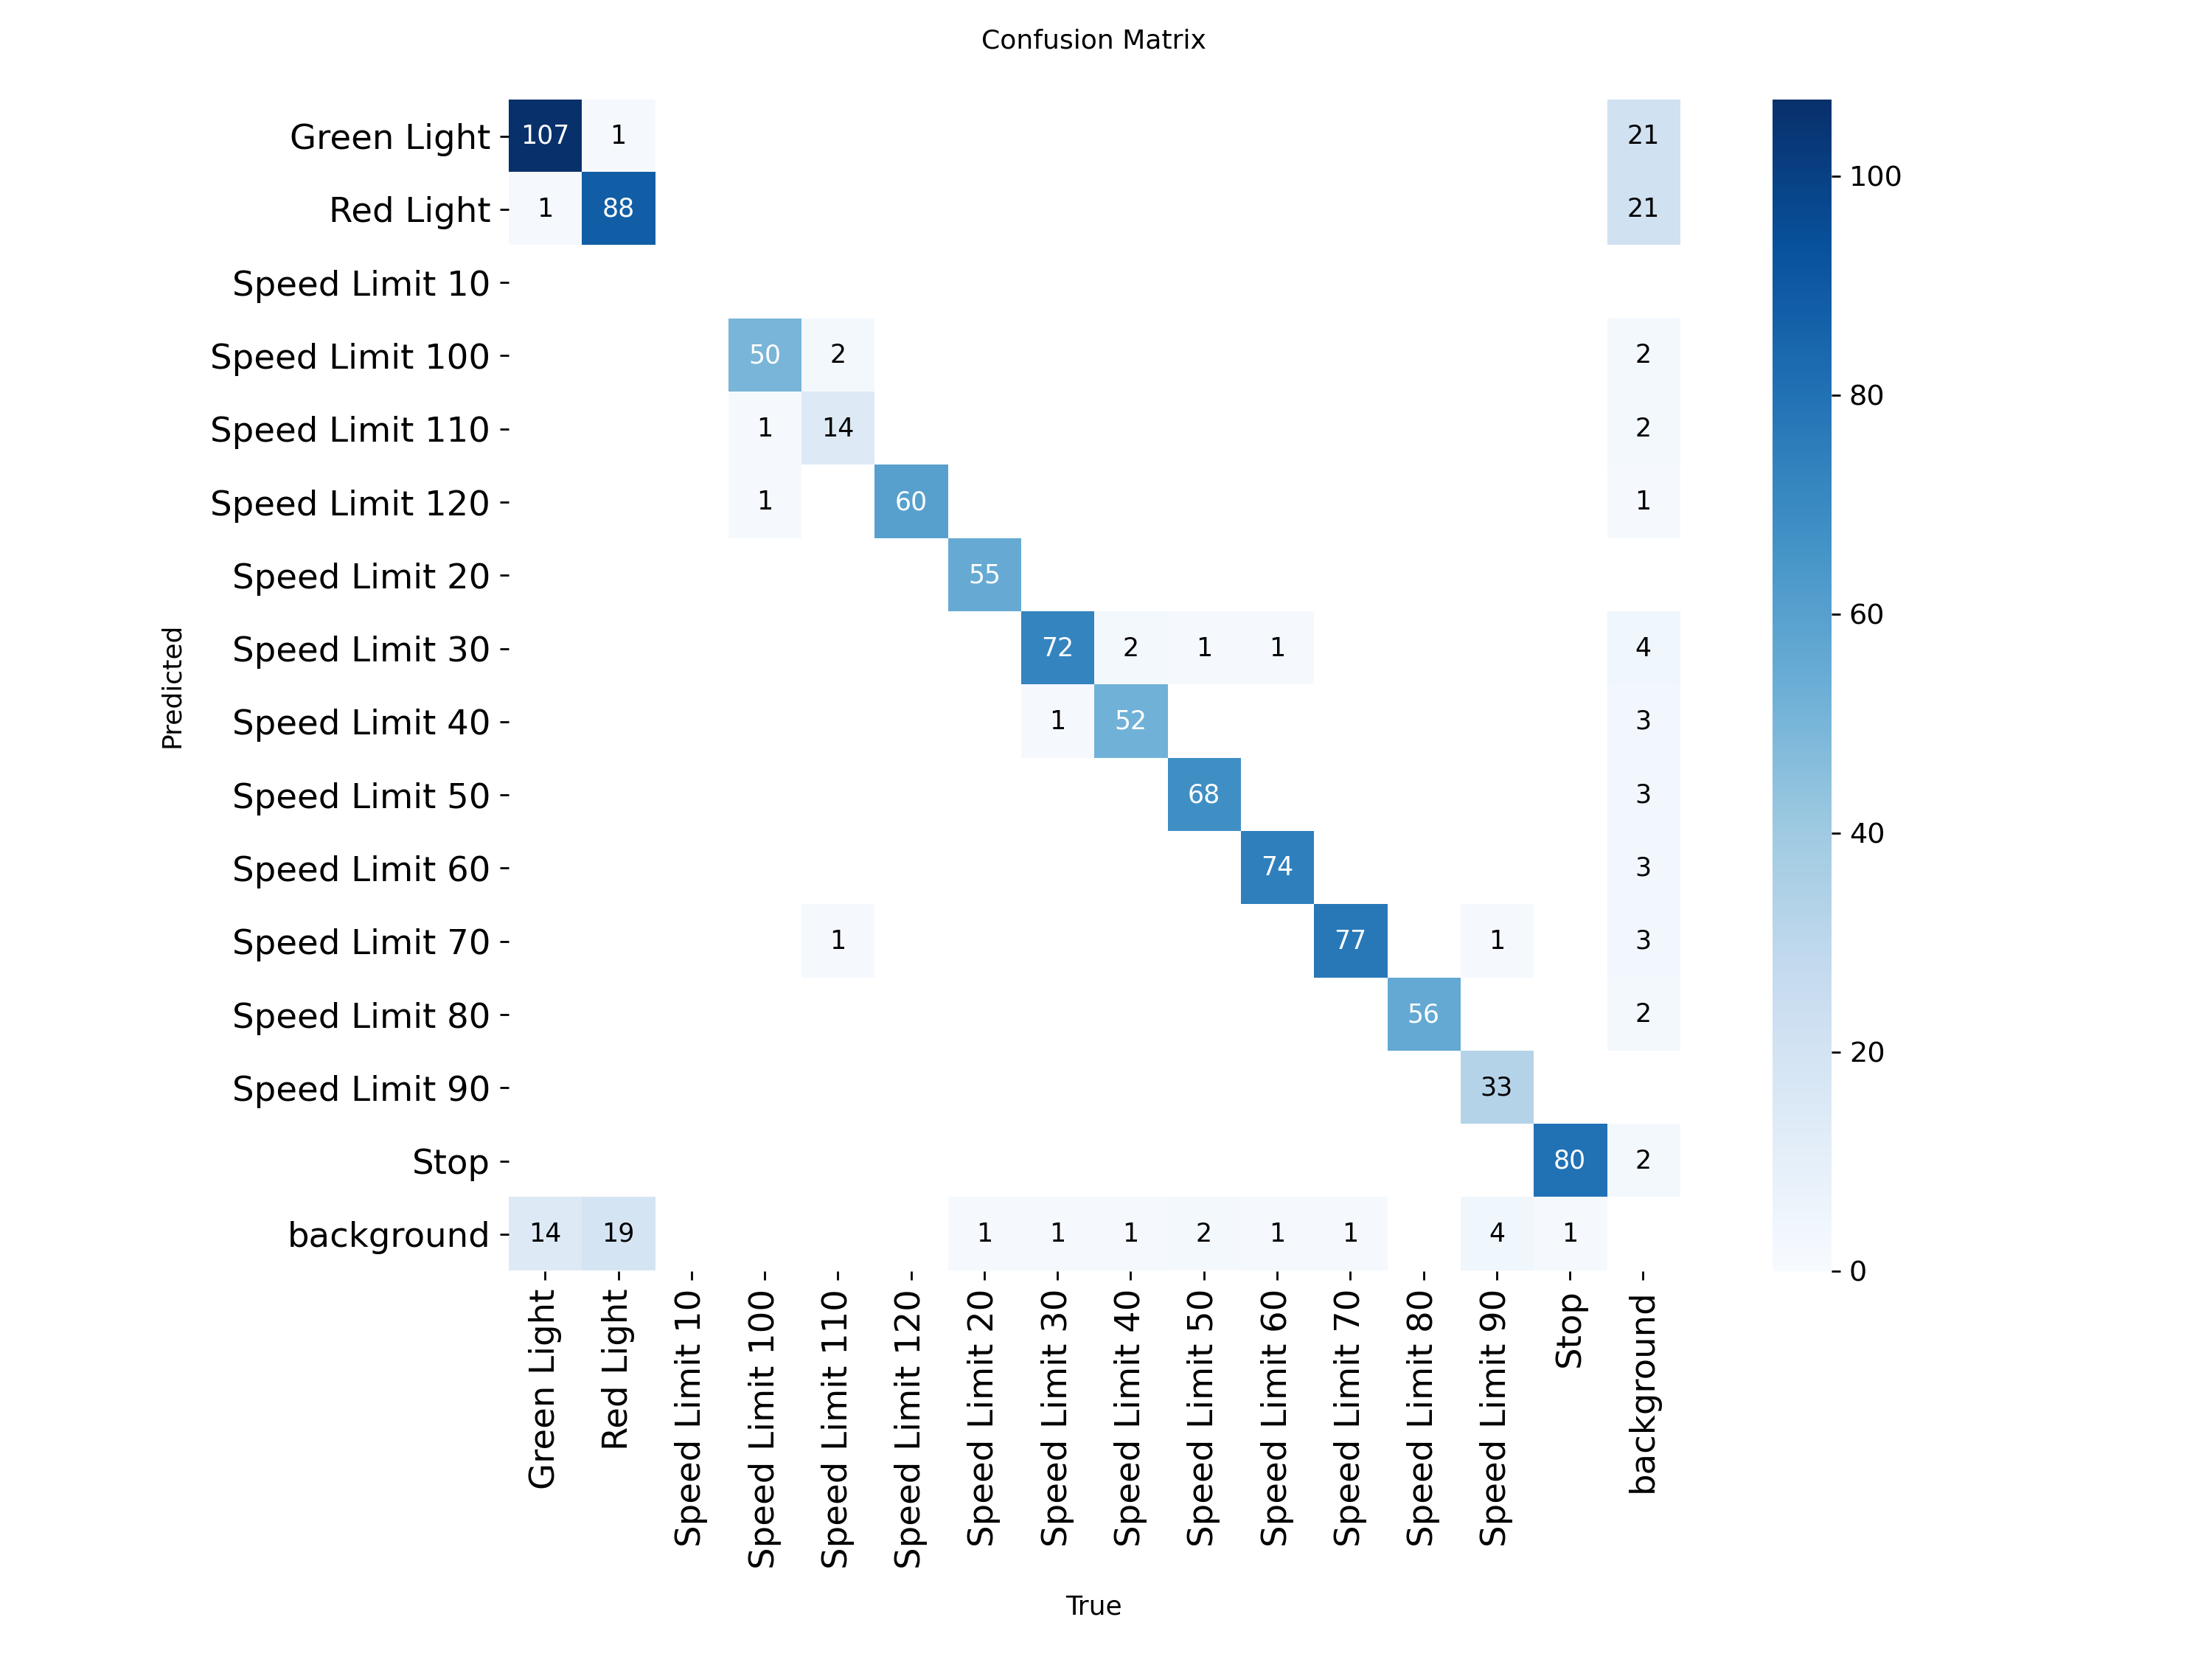

In [5]:
#Confusion Matrix
display(Image(filename='/kaggle/working/runs/detect/train2/confusion_matrix.png'))

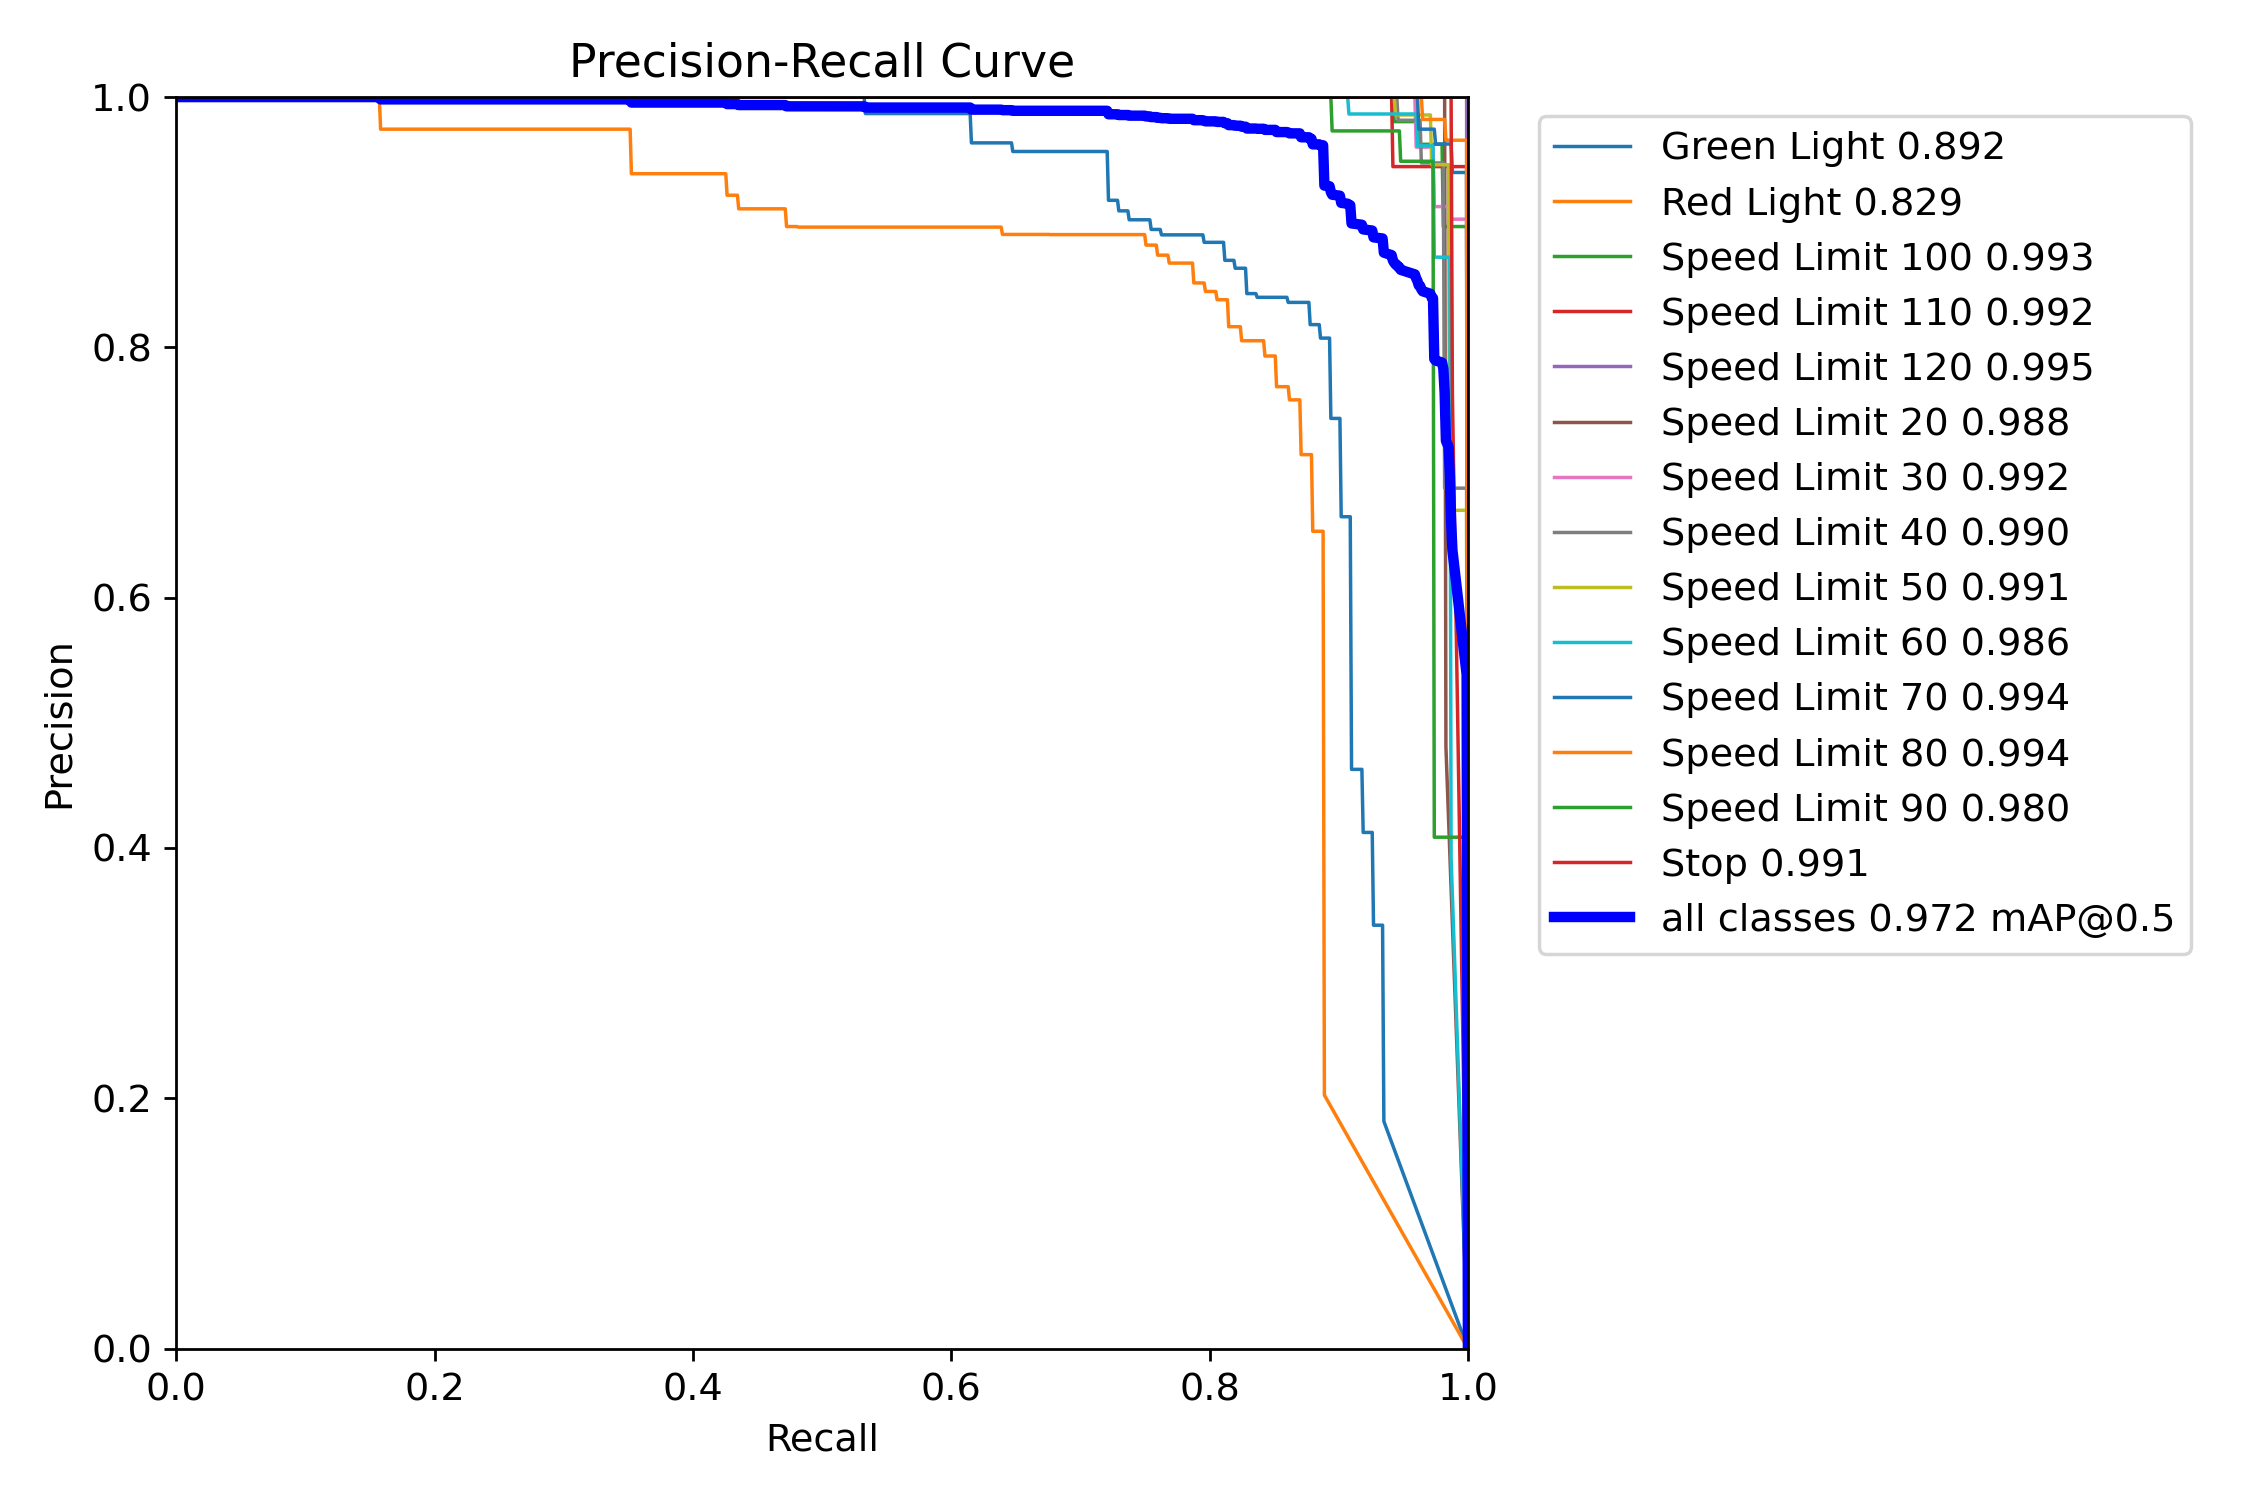

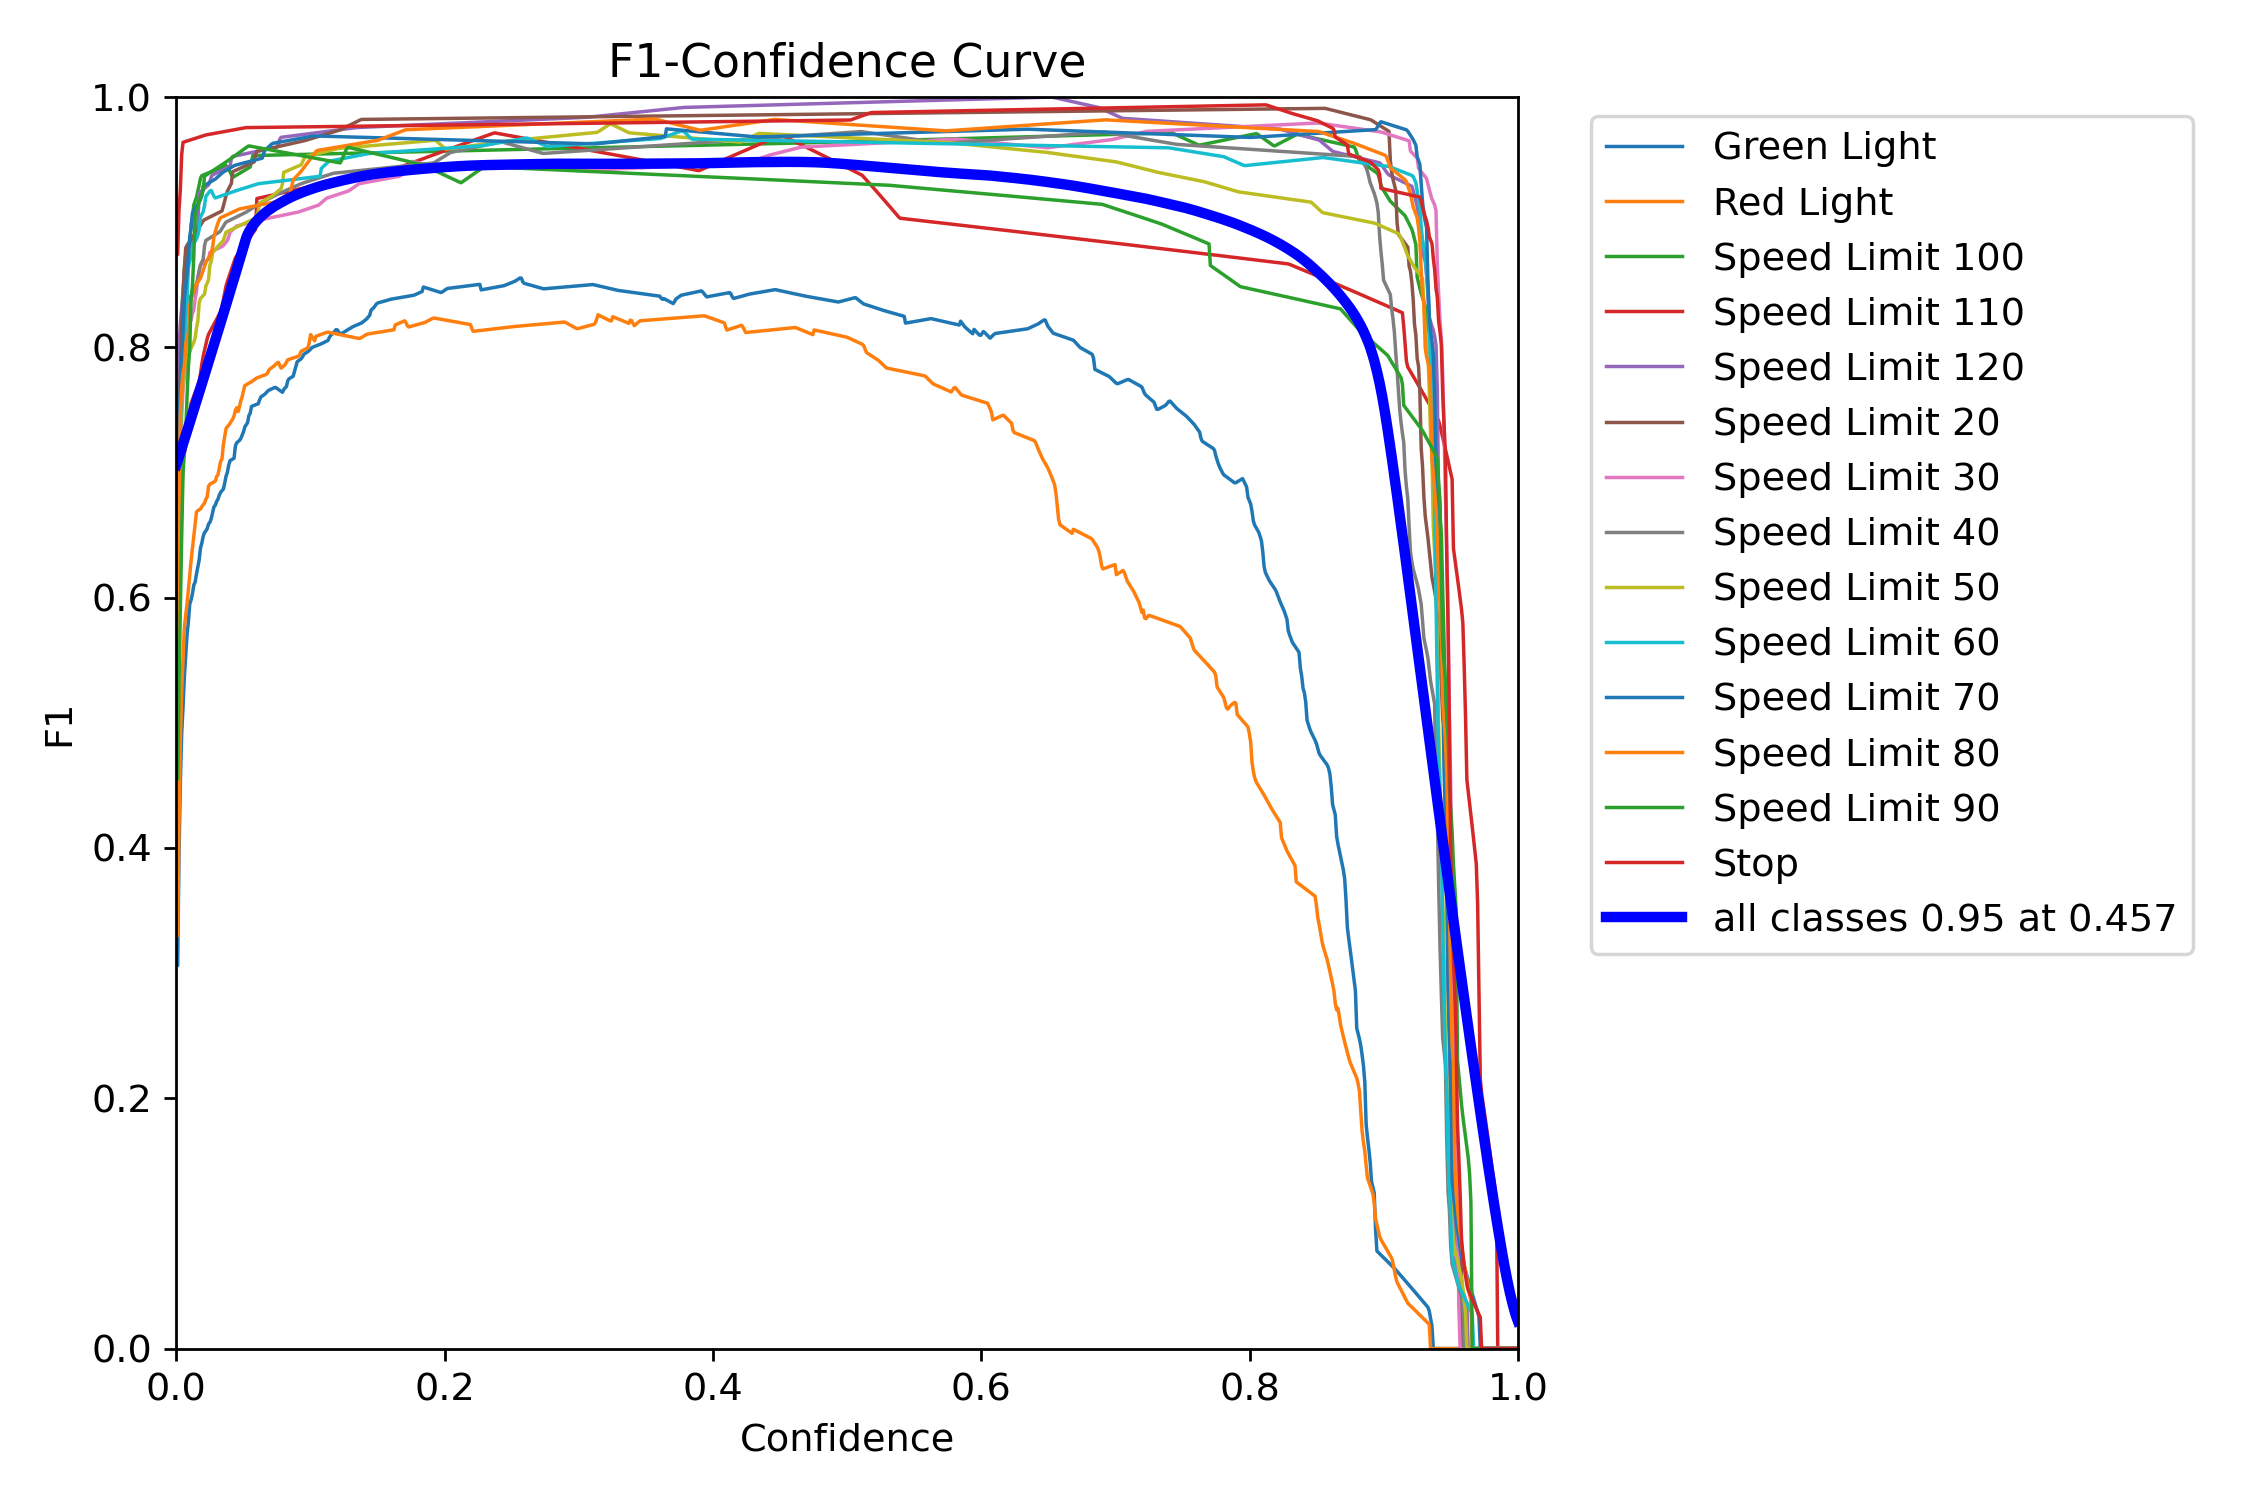

In [6]:
#Precision-Recall Curve
display(Image('/kaggle/working/runs/detect/train2/PR_curve.png'))

#F1 Score Curve
display(Image('/kaggle/working/runs/detect/train2/F1_curve.png'))

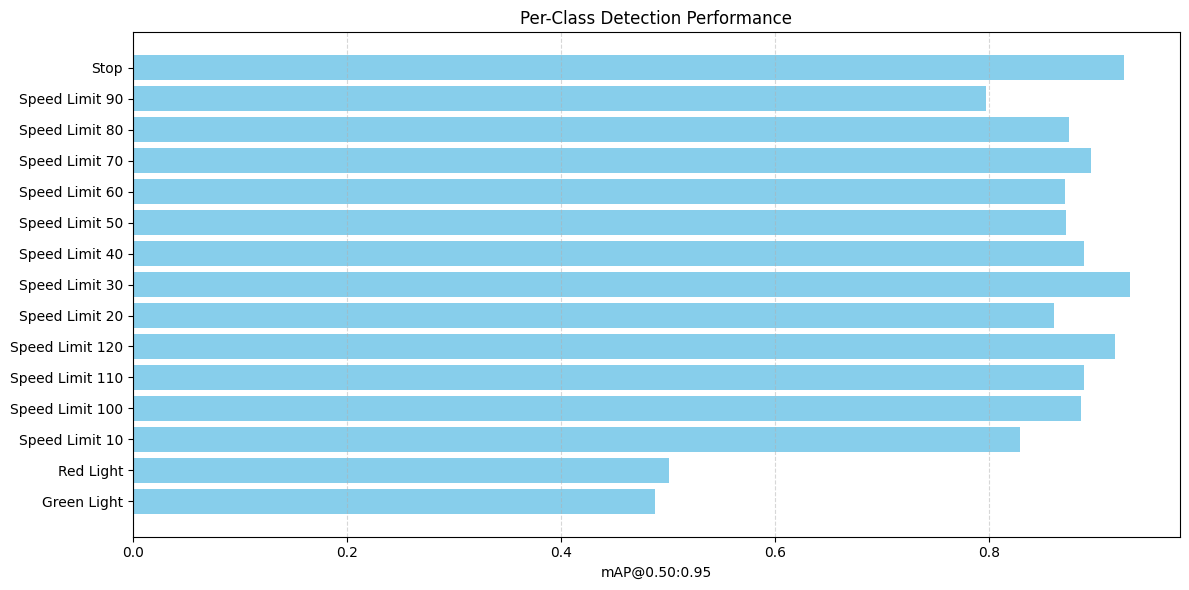

In [7]:
names = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110',
         'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40',
         'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80',
         'Speed Limit 90', 'Stop']

maps = np.array([
    0.48786, 0.50094, 0.82823, 0.88537, 0.88871,
    0.91751, 0.86082, 0.93154, 0.88822, 0.87153,
    0.87082, 0.89497, 0.87408, 0.79689, 0.92593
])

plt.figure(figsize=(12, 6))
plt.barh(names, maps, color='skyblue')
plt.xlabel('mAP@0.50:0.95')
plt.title('Per-Class Detection Performance')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [8]:
for i, name in enumerate(names):
    print(f"{name:<20}: {maps[i]:.3f}")

Green Light         : 0.488
Red Light           : 0.501
Speed Limit 10      : 0.828
Speed Limit 100     : 0.885
Speed Limit 110     : 0.889
Speed Limit 120     : 0.918
Speed Limit 20      : 0.861
Speed Limit 30      : 0.932
Speed Limit 40      : 0.888
Speed Limit 50      : 0.872
Speed Limit 60      : 0.871
Speed Limit 70      : 0.895
Speed Limit 80      : 0.874
Speed Limit 90      : 0.797
Stop                : 0.926


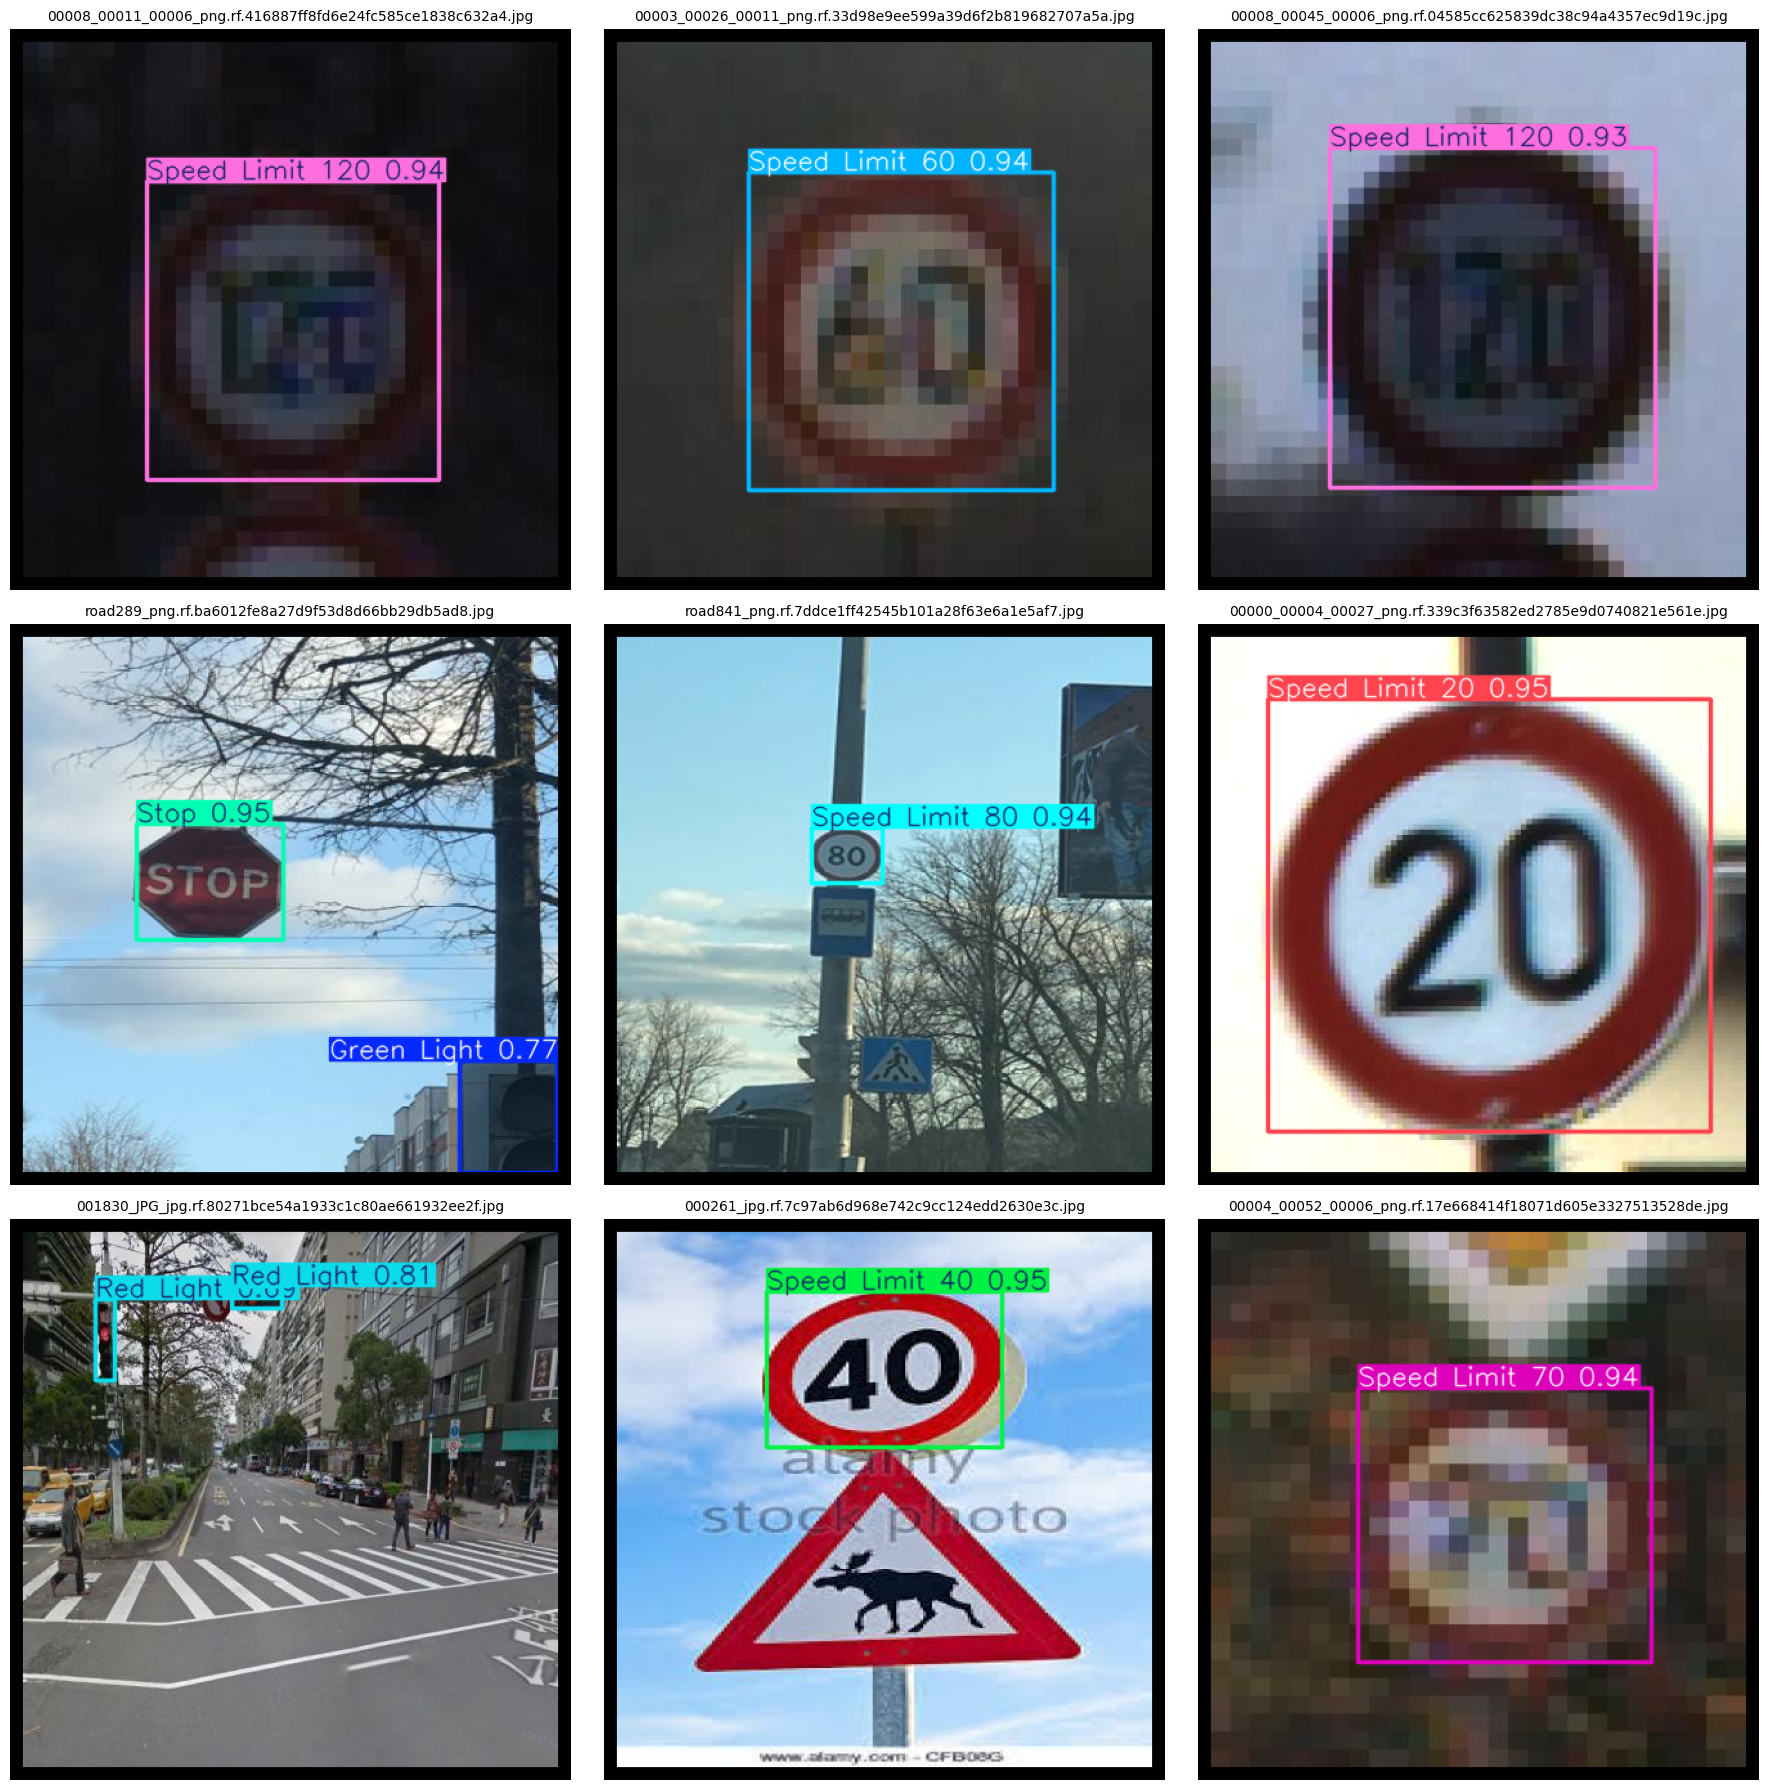

In [9]:
#Get 9 test images
image_paths = sorted(glob.glob("/kaggle/input/cardetection/car/test/images/*.jpg"))[:9]

#Get all test images, then randomly choose 9
all_images = glob.glob("/kaggle/input/cardetection/car/test/images/*.jpg")
image_paths = random.sample(all_images, 9)

#Set up 3x3 subplot grid
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

for idx, img_path in enumerate(image_paths):
    results = model(img_path, save=False, conf=0.25, verbose=False)
    annotated_img = results[0].plot()

    #Add black border
    bordered_img = cv2.copyMakeBorder(
        annotated_img, 10, 10, 10, 10,
        cv2.BORDER_CONSTANT, value=[0, 0, 0]
    )

    #Show image in the appropriate subplot
    row = idx // 3
    col = idx % 3
    axs[row, col].imshow(bordered_img[..., ::-1])  # Convert BGR to RGB
    axs[row, col].set_title(os.path.basename(img_path), fontsize=10)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [10]:
#Input and output video paths
input_video = "/kaggle/input/cardetection/video.mp4"
output_video = "/kaggle/working/detected_video.mp4"

#Load video
cap = cv2.VideoCapture(input_video)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = int(cap.get(cv2.CAP_PROP_FPS))

#Define video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video, fourcc, fps, (width + 20, height + 20))  

#Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    #Run detection
    results = model(frame, conf=0.25, verbose=False)
    annotated = results[0].plot()  

    #Add border (10 pixels on all sides, black)
    bordered = cv2.copyMakeBorder(
        annotated, 10, 10, 10, 10,
        cv2.BORDER_CONSTANT, value=[0, 0, 0]
    )

    out.write(bordered)

cap.release()
out.release()
print("Annotated video with borders saved at:", output_video)

Annotated video with borders saved at: /kaggle/working/detected_video.mp4


In [11]:
#Convert format
!ffmpeg -y -loglevel panic -i /kaggle/working/detected_video.mp4

#Display the video 
Video("detected_video.mp4", width=960)